In [ ]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

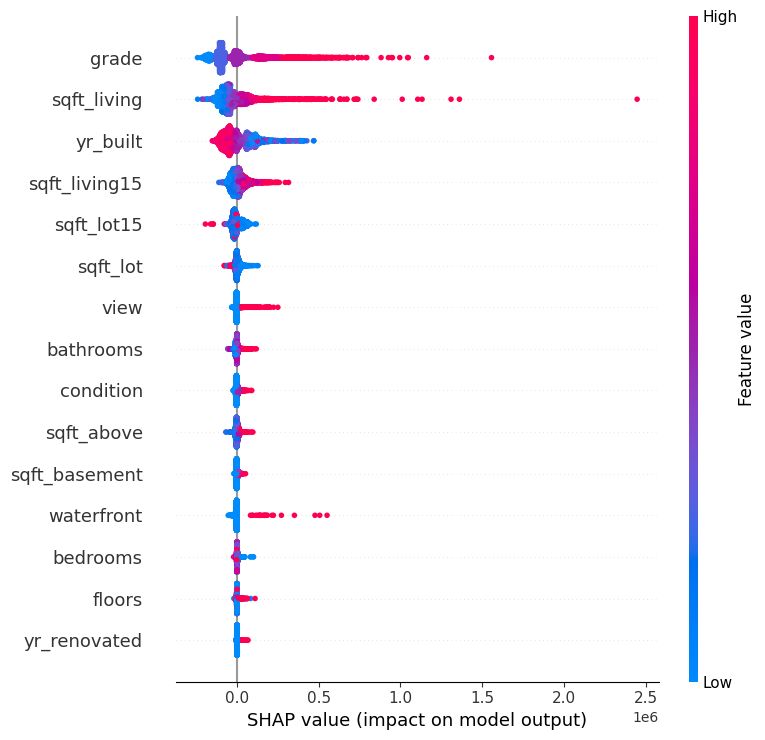

Feature Importances using SHAP:
          Feature     Importance
0        bedrooms    2438.298797
1       bathrooms    7100.163119
2     sqft_living   77997.446327
3        sqft_lot    9763.660471
4          floors    2343.933570
5      waterfront    4537.335856
6            view    7506.567936
7       condition    6839.394021
8           grade  119482.464072
9      sqft_above    6643.884680
10  sqft_basement    4722.144778
11       yr_built   67740.999124
12   yr_renovated    1484.362874
13  sqft_living15   31405.050564
14     sqft_lot15   22298.643996


In [1]:


df = pd.read_csv("houses.csv")

# handle these better with your own dataset, here we are simply dropping these
df = df.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)

# Define features and target
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15']]

y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)

# Feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.mean(np.abs(shap_values), axis=0)
})
print("Feature Importances using SHAP:")
print(importance)